# Task: Sentiment Analysis for Movie Reviews

### Objective:
Develop a robust machine learning model capable of accurately classifying movie
reviews as positive or negative based on the textual content.

### About Dataset
IMDB dataset having 50K movie reviews for natural language processing or Text analytics. This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets.<br><br>
**Link:** <a>https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews</a>

#### Importing necessary libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import nltk, re, os, string, pickle
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Importing dataset

In [2]:
dataset = pd.read_csv("./data/IMDB Dataset.csv")

### Exploratory Data Analysis (EDA)

In [3]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
dataset['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

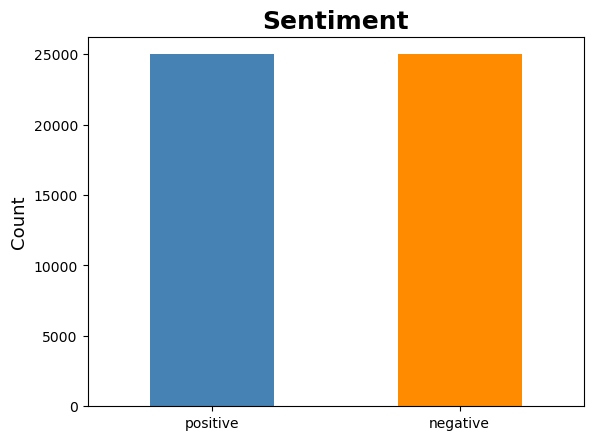

In [6]:
fig, ax = plt.subplots()

dataset['sentiment'].value_counts().plot(kind = 'bar', ax = ax, color = ['steelBlue', 'DarkOrange'])
ax.set_title('Sentiment', fontsize = 18, fontweight = 'bold')
ax.set_ylabel('Count', fontsize = 13)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);

There are two labels for our target columns and we can see our dataset is completely balanced.

### Data Cleaning

Data cleaning process includes following tasks:<br>
1. Removal of HTML contents.
2. Removal of punctuations.
3. Lowercasing the text.
4. Removal of stopwords.
5. Stemming/Lemmatization.
6. Vectorization

Let's try to do data cleaning in single text data and then later apply it to all dataset.

In [17]:
review = dataset['review'][0]
review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

**1. Removal of HTML contents**

In [18]:
soup = BeautifulSoup(review, "html.parser")
review = soup.get_text()
review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

**2. Removal of punctuations**

In [19]:
review = re.sub('\[[^]]*\]', ' ', review)
review = re.sub('[^a-zA-Z]', ' ', review)
review

'One of the other reviewers has mentioned that after watching just   Oz episode you ll be hooked  They are right  as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows wo

**3. Lowercasing the text**

In [20]:
review = review.lower()
review

'one of the other reviewers has mentioned that after watching just   oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

**4. Removal of stopwords**<br><br>
Splitting the words into list.

In [21]:
review = review.split()
review

['one',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 'oz',
 'episode',
 'you',
 'll',
 'be',
 'hooked',
 'they',
 'are',
 'right',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me',
 'the',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'go',
 'trust',
 'me',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 'this',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 'sex',
 'or',
 'violence',
 'its',
 'is',
 'hardcore',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word',
 'it',
 'is',
 'called',
 'oz',
 'as',
 'that',
 'is',
 'the',
 'nickname',
 'given',
 'to',
 'the',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'it',
 'focuses',
 'mainly',
 'on',
 '

In [22]:
review = [word for word in review if not word in set(stopwords.words('english'))]
review

['one',
 'reviewers',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goes',
 'shows',
 'dare',
 

**5. Stemming/Lemmatization.**<br>
We use lemmatization instead of stemming because lemmatization gives the actual meaning to the word.

In [23]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [25]:
words_and_tags = nltk.pos_tag(review)

lemmatizer = WordNetLemmatizer()
review = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]
review

['one',
 'reviewer',
 'mention',
 'watch',
 'oz',
 'episode',
 'hook',
 'right',
 'exactly',
 'happen',
 'first',
 'thing',
 'strike',
 'oz',
 'brutality',
 'unflinching',
 'scene',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'call',
 'oz',
 'nickname',
 'give',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focus',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryan',
 'muslim',
 'gangstas',
 'latinos',
 'christian',
 'italian',
 'irish',
 'scuffle',
 'death',
 'stare',
 'dodgy',
 'dealing',
 'shady',
 'agreement',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'go',
 'show',
 'dare',
 'forget',
 'pretty',
 'picture',
 

Finally, we merge the words in form a text.

In [26]:
review = ' '.join(review)
review

'one reviewer mention watch oz episode hook right exactly happen first thing strike oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangstas latinos christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture paint mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watch developed taste oz get accustomed high level graphic violence violence injustice crook guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experience watch oz may become comfortable

**6. Vectorization**<br>
Converting text into TF-IDF.

In [27]:
corpus = []
corpus.append(review)

In [28]:
tf_idf = TfidfVectorizer()
review_tf_idf = tf_idf.fit_transform(corpus)

review_tf_idf.toarray()

array([[0.06178021, 0.06178021, 0.06178021, 0.06178021, 0.06178021,
        0.06178021, 0.06178021, 0.12356041, 0.06178021, 0.06178021,
        0.06178021, 0.06178021, 0.06178021, 0.06178021, 0.06178021,
        0.12356041, 0.06178021, 0.06178021, 0.06178021, 0.06178021,
        0.06178021, 0.06178021, 0.06178021, 0.06178021, 0.06178021,
        0.06178021, 0.06178021, 0.12356041, 0.06178021, 0.06178021,
        0.12356041, 0.06178021, 0.06178021, 0.06178021, 0.06178021,
        0.06178021, 0.06178021, 0.06178021, 0.06178021, 0.12356041,
        0.06178021, 0.18534062, 0.06178021, 0.06178021, 0.18534062,
        0.06178021, 0.06178021, 0.12356041, 0.06178021, 0.06178021,
        0.06178021, 0.06178021, 0.06178021, 0.12356041, 0.06178021,
        0.06178021, 0.06178021, 0.12356041, 0.06178021, 0.06178021,
        0.06178021, 0.06178021, 0.06178021, 0.06178021, 0.06178021,
        0.06178021, 0.06178021, 0.06178021, 0.06178021, 0.06178021,
        0.06178021, 0.06178021, 0.06178021, 0.06

### Splitting dataset into train and test set

In [29]:
X = dataset['review']
y = dataset['sentiment']

y = (y.replace({'positive': 1, 'negative': 0})).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [30]:
corpus_train = []
corpus_test  = []
lem = WordNetLemmatizer()

for i in range(X_train.shape[0]):
    soup = BeautifulSoup(X_train.iloc[i], "html.parser")
    review = soup.get_text()
    review = re.sub('\[[^]]*\]', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    words_and_tags = nltk.pos_tag(review)
    review = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]
    review = ' '.join(review)
    corpus_train.append(review)
    
for j in range(X_test.shape[0]):
    soup = BeautifulSoup(X_test.iloc[j], "html.parser")
    review = soup.get_text()
    review = re.sub('\[[^]]*\]', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    words_and_tags = nltk.pos_tag(review)
    review = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]
    review = ' '.join(review)
    corpus_test.append(review)

C:\Users\Nirajan\Desktop\Artificial Intelligence\Learning\env\lib\site-packages\bs4\__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


In [33]:
tfidf_vec = TfidfVectorizer()

tfidf = tfidf_vec.fit(corpus_train)

pickle.dump(tfidf, open('./model/tfidf.pkl', 'wb'))

In [34]:
X_train_vec = tfidf.transform(corpus_train)
X_test_vec = tfidf.transform(corpus_test)

### Training the model

#### 1. Logistic regression

In [41]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_vec, y_train)

y_pred = logistic_regression.predict(X_test_vec)
accuracy = metrics.accuracy_score(y_pred, y_test)
print(f'Accuracy : {accuracy*100}%')
print(f"Classification Report: \n {metrics.classification_report(y_test, y_pred,target_names=['Negative','Positive'])}")
print(f'Confusion Matrix: \n {metrics.confusion_matrix(y_test, y_pred)}')

Accuracy : 89.38000000000001%
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.91      0.87      0.89      5044
    Positive       0.88      0.91      0.90      4956

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix: 
 [[4408  636]
 [ 426 4530]]


In [42]:
print(f'The accuracy of Logistic Regression on Train_set is {metrics.accuracy_score(y_train, logistic_regression.predict(X_train_vec))*100:.2f}%.')
print(f'The accuracy of Logistic Regression on Test_set is {metrics.accuracy_score(y_test, logistic_regression.predict(X_test_vec))*100:.2f}%.')

The accuracy of Logistic Regression on Train_set is 92.91%.
The accuracy of Logistic Regression on Test_set is 89.38%.


In [43]:
with open('.\model\LR.pkl', 'wb') as file:
    pickle.dump(logistic_regression, file)

In [51]:
grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

grid_CV_logistic = GridSearchCV(logistic_regression, grid, cv=5, scoring='accuracy', verbose=2)
grid_CV_logistic.fit(X_train_vec, y_train)
best_param = grid_CV_logistic.best_params_
print(best_param)

final_lr = grid_CV_logistic.best_estimator_
y_pred = final_lr.predict(X_test_vec)

accuracy = metrics.accuracy_score(y_pred, y_test)
print(f'Accuracy : {accuracy*100}%')
print(f"Classification Report: \n {metrics.classification_report(y_test, y_pred,target_names=['Negative','Positive'])}")
print(f'Confusion Matrix: \n {metrics.confusion_matrix(y_test, y_pred)}')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=0.001, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=0.001, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=0.001, max_iter=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....C=0.001, max_iter=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....C=0.001, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.001, max_iter=100, penalty=l2, sol

[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=10

[CV] END ....C=1, max_iter=500, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ....C=1, max_iter=500, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END .........C=1, max_iter=500, penalty=l1, solver=saga; total time=   8.8s
[CV] END .........C=1, max_iter=500, penalty=l1, solver=saga; total time=   9.1s
[CV] END .........C=1, max_iter=500, penalty=l1, solver=saga; total time=   9.2s
[CV] END .........C=1, max_iter=500, penalty=l1, solver=saga; total time=  10.5s
[CV] END .........C=1, max_iter=500, penalty=l1, solver=saga; total time=  10.9s
[CV] END ....C=1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END ....C=1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END ....C=1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END ....C=1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.5s
[CV] END ....C=1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END .........C=1, max_i

In [52]:
print(f'The accuracy of Final LR on Train_set is {metrics.accuracy_score(y_train, final_lr.predict(X_train_vec))*100:.2f}%.')
print(f'The accuracy of Final LR on Test_set is {metrics.accuracy_score(y_test, final_lr.predict(X_test_vec))*100:.2f}%.')

The accuracy of Final LR on Train_set is 92.90%.
The accuracy of Final LR on Test_set is 89.39%.


In [53]:
with open('.\model\\final_LR.pkl', 'wb') as file:
    pickle.dump(final_lr, file)

#### 2. Linear SVC

In [54]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_vec, y_train)

y_pred = linear_svc.predict(X_test_vec)
accuracy = metrics.accuracy_score(y_pred, y_test)
print(f'Accuracy : {accuracy*100}%')
print(f"Classification Report: \n {metrics.classification_report(y_test, y_pred,target_names=['Negative','Positive'])}")
print(f'Confusion Matrix: \n {metrics.confusion_matrix(y_test, y_pred)}')

Accuracy : 89.91%
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      5044
    Positive       0.89      0.91      0.90      4956

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion Matrix: 
 [[4493  551]
 [ 458 4498]]


In [55]:
print(f'The accuracy of Linear SVC on Train_set is {metrics.accuracy_score(y_train, linear_svc.predict(X_train_vec))*100:.2f}%.')
print(f'The accuracy of Linear SVC on Test_set is {metrics.accuracy_score(y_test, linear_svc.predict(X_test_vec))*100:.2f}%.')

The accuracy of Linear SVC on Train_set is 98.30%.
The accuracy of Linear SVC on Test_set is 89.91%.


In [56]:
with open('.\model\linear_svc.pkl', 'wb') as file:
    pickle.dump(linear_svc, file)

In [57]:
grid = {
    'C': [0.01, 0.1, 0.5, 1], 
    'loss': ['hinge', 'squared_hinge'],
    'max_iter': [1000, 5000, 10000]
}

grid_CV_svc = GridSearchCV(linear_svc, grid, cv=5, scoring='accuracy', verbose=2)
grid_CV_svc.fit(X_train_vec, y_train)
best_param = grid_CV_svc.best_params_
print(best_param)

final_svc = grid_CV_svc.best_estimator_
y_pred = final_svc.predict(X_test_vec)

accuracy = metrics.accuracy_score(y_pred, y_test)
print(f'Accuracy : {accuracy*100}%')
print(f"Classification Report: \n {metrics.classification_report(y_test, y_pred,target_names=['Negative','Positive'])}")
print(f'Confusion Matrix: \n {metrics.confusion_matrix(y_test, y_pred)}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..................C=0.01, loss=hinge, max_iter=1000; total time=   0.0s
[CV] END ..................C=0.01, loss=hinge, max_iter=1000; total time=   0.0s
[CV] END ..................C=0.01, loss=hinge, max_iter=1000; total time=   0.2s
[CV] END ..................C=0.01, loss=hinge, max_iter=1000; total time=   0.0s
[CV] END ..................C=0.01, loss=hinge, max_iter=1000; total time=   0.1s
[CV] END ..................C=0.01, loss=hinge, max_iter=5000; total time=   0.0s
[CV] END ..................C=0.01, loss=hinge, max_iter=5000; total time=   0.0s
[CV] END ..................C=0.01, loss=hinge, max_iter=5000; total time=   0.0s
[CV] END ..................C=0.01, loss=hinge, max_iter=5000; total time=   0.0s
[CV] END ..................C=0.01, loss=hinge, max_iter=5000; total time=   0.0s
[CV] END .................C=0.01, loss=hinge, max_iter=10000; total time=   0.1s
[CV] END .................C=0.01, loss=hinge, m

[CV] END ....................C=1, loss=hinge, max_iter=10000; total time=   0.7s
[CV] END ....................C=1, loss=hinge, max_iter=10000; total time=   0.5s
[CV] END ....................C=1, loss=hinge, max_iter=10000; total time=   0.5s
[CV] END ....................C=1, loss=hinge, max_iter=10000; total time=   0.5s
[CV] END .............C=1, loss=squared_hinge, max_iter=1000; total time=   0.5s
[CV] END .............C=1, loss=squared_hinge, max_iter=1000; total time=   0.5s
[CV] END .............C=1, loss=squared_hinge, max_iter=1000; total time=   0.5s
[CV] END .............C=1, loss=squared_hinge, max_iter=1000; total time=   0.5s
[CV] END .............C=1, loss=squared_hinge, max_iter=1000; total time=   0.5s
[CV] END .............C=1, loss=squared_hinge, max_iter=5000; total time=   0.5s
[CV] END .............C=1, loss=squared_hinge, max_iter=5000; total time=   0.5s
[CV] END .............C=1, loss=squared_hinge, max_iter=5000; total time=   0.5s
[CV] END .............C=1, l

In [58]:
print(f'The accuracy of Final Linear SVC on Train_set is {metrics.accuracy_score(y_train, final_svc.predict(X_train_vec))*100:.2f}%.')
print(f'The accuracy of Final Linear SVC on Test_set is {metrics.accuracy_score(y_test, final_svc.predict(X_test_vec))*100:.2f}%.')

The accuracy of Final Linear SVC on Train_set is 96.97%.
The accuracy of Final Linear SVC on Test_set is 89.92%.


In [59]:
with open('.\model\\final_svc.pkl', 'wb') as file:
    pickle.dump(final_svc, file)

#### Conclusion
From the above two model, linear SVC is giving higher accuracy but the model is overfitted. So, the optimal model is final logistic regression which is less overfitted compared to linear SVC.

In [167]:
def predict_lr(text):
    corpus = []
    soup = BeautifulSoup(text, "html.parser")
    review = soup.get_text()
    review = re.sub('\[[^]]*\]', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    lemmatizer = WordNetLemmatizer()
    words_and_tags = nltk.pos_tag(review)
    review = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]
    review = ' '.join(review)
    corpus.append(review)
    review_tf_idf = tfidf.transform(corpus)
    review_tf_idf.toarray()
    
    output = final_lr.predict(review_tf_idf)

    if output.item() == 1:
        print('Positive')
    else:
        print('Negative')

In [168]:
text1 = 'Starting was not that great but as the movie progressed, the story become more interesting.'
text2 = 'This is not what I expected when I watched the trailor of the movie. The story is so generic.'

In [169]:
predict_lr(text1)

Positive


In [170]:
predict_lr(text2)

Negative


This concludes the ML part.